In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Виконаємо завантаження та підготовку даних з набору fashion_mnist для навчання моделі.

In [8]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [9]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


In [10]:
print("Розмір тренувального датасету:", len(train_data))
print("Мітки тренувального датасету:", train_labels)
print("Значення міток: від", min(train_labels), "до", max(train_labels))
print("Розмір тестового датасету:", len(test_data))

Розмір тренувального датасету: 60000
Мітки тренувального датасету: [9 0 0 ... 3 0 5]
Значення міток: від 0 до 9
Розмір тестового датасету: 10000


In [11]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


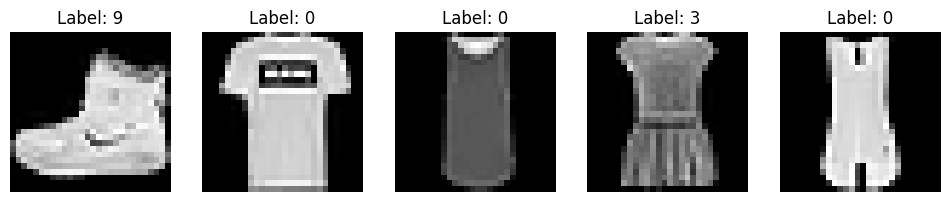

In [12]:
num_samples = 5
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_data[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

Створення моделі

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Компіляція і тренування моделі


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_data, train_labels, epochs=12, batch_size=256,
                    validation_data=(test_data, test_labels))

Epoch 1/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6141 - loss: 2.6210 - val_accuracy: 0.8293 - val_loss: 0.4920
Epoch 2/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8460 - loss: 0.4282 - val_accuracy: 0.8539 - val_loss: 0.4133
Epoch 3/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8723 - loss: 0.3495 - val_accuracy: 0.8699 - val_loss: 0.3703
Epoch 4/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8880 - loss: 0.3135 - val_accuracy: 0.8748 - val_loss: 0.3568
Epoch 5/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8975 - loss: 0.2809 - val_accuracy: 0.8829 - val_loss: 0.3333
Epoch 6/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9066 - loss: 0.2577 - val_accuracy: 0.8827 - val_loss: 0.3341
Epoch 7/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9093 - loss: 0.2470 - val_accuracy: 0.8848 - val_loss: 0.3315
Epoch 8/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9166 - loss: 0.2273 - val_accuracy: 0

Варто зазначити, що навчання моделі тривало майже за хвилину (порівняно з нейронною мережею у минулому завданні)



In [16]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8882 - loss: 0.3408
Test Accuracy: 0.892799973487854


In [17]:
def history_visual(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
    plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

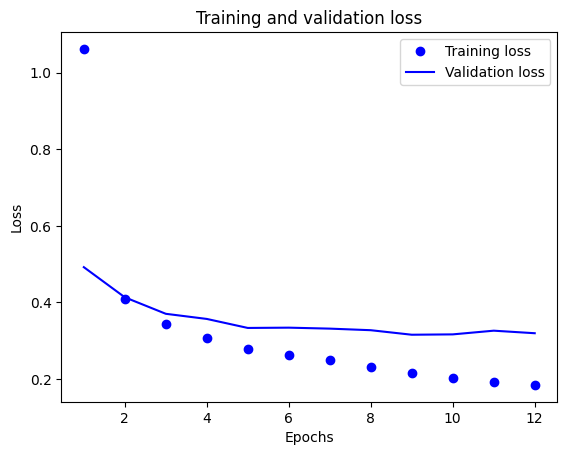

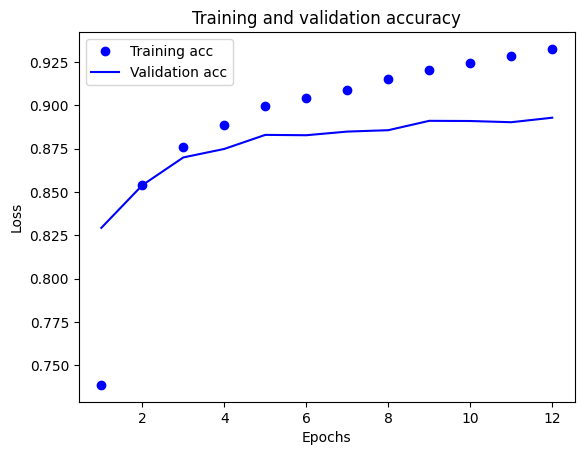

In [18]:
history_visual(history)

Висновок №1


Побудована модель показала гарні результати на навчальній вибірці: точність нейромережі становить приблизно 94%. На валідаційних даних результати дещо гірші: максимальна точність склала приблизно 90%. У порівнянні з найкращою моделлю, побудованою у домашньому завданні №9, згорткова нейромережа показала кращі результати.

**Частина №2**


Завантаження передвиборної моделі VGG16 без повністю з'єднаних шарів

In [1]:
from tensorflow.keras.applications import VGG16

vgg16_base = VGG16(weights='imagenet', include_top=False,
                   input_shape=(64, 64, 3))
vgg16_base.trainable = False

vgg16_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)



Побудова моделі та її компіляція



In [2]:

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model1 = Sequential([
    vgg16_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




Підготовка даних

In [3]:
import numpy as np
from keras import layers
from keras import models
from keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

def resize_image(image, target_size=(64, 64)):
    image = Image.fromarray(image)
    image = image.resize(target_size)
    return np.array(image)

def preprocess_image(image):
    image = image / 255.0
    return image


(train_data1, train_labels1), (test_data1, test_labels1) = fashion_mnist.load_data()

train_data1, test_data1 = train_data1 / 255., test_data1 / 255.

resized_train_data = np.array([resize_image(img) for img in train_data1])
resized_test_data = np.array([resize_image(img) for img in test_data1])

# Перевірка розмірів після зміни
print(resized_train_data.shape)
print(resized_test_data.shape)


(60000, 64, 64)
(10000, 64, 64)


In [4]:
resized_train_data = np.expand_dims(resized_train_data, axis=-1)
resized_train_data = np.repeat(resized_train_data, 3, axis=-1)
resized_test_data = np.expand_dims(resized_test_data, axis=-1)
resized_test_data = np.repeat(resized_test_data, 3, axis=-1)

print(resized_train_data.shape)
print(resized_test_data.shape)





(60000, 64, 64, 3)
(10000, 64, 64, 3)


Тренування моделі

In [5]:
history1 = model1.fit(
    resized_train_data,
    train_labels1,
    epochs=25,
    batch_size=256,
    validation_data=(resized_test_data, test_labels1)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 49s 141ms/step - accuracy: 0.6906 - loss: 0.8810 - val_accuracy: 0.8704 - val_loss: 0.3568
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 59s 103ms/step - accuracy: 0.8546 - loss: 0.4040 - val_accuracy: 0.8738 - val_loss: 0.3343
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - accuracy: 0.8700 - loss: 0.3672 - val_accuracy: 0.8889 - val_loss: 0.3079
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.8755 - loss: 0.3424 - val_accuracy: 0.8884 - val_loss: 0.3111
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - accuracy: 0.8847 - loss: 0.3228 - val_accuracy: 0.8856 - val_loss: 0.3077
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 104ms/step - accuracy: 0.8871 - loss: 0.3086 - val_accuracy: 0.8917 - val_loss: 0.2944
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - accuracy: 0.8952 - loss: 0.2933 - val_accuracy: 0.8968 - val_loss: 0.2877
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 104ms/step - accuracy: 0.8969 - loss: 0.28

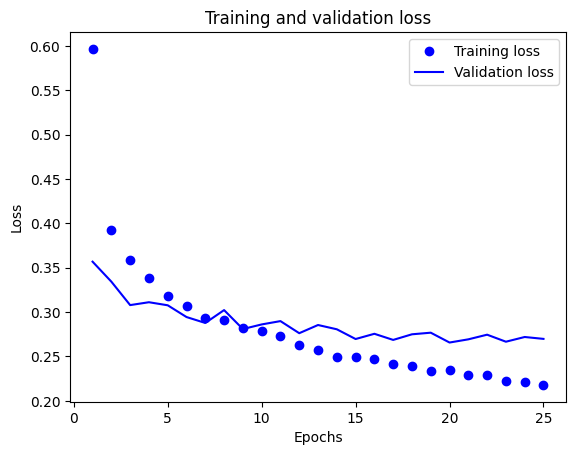

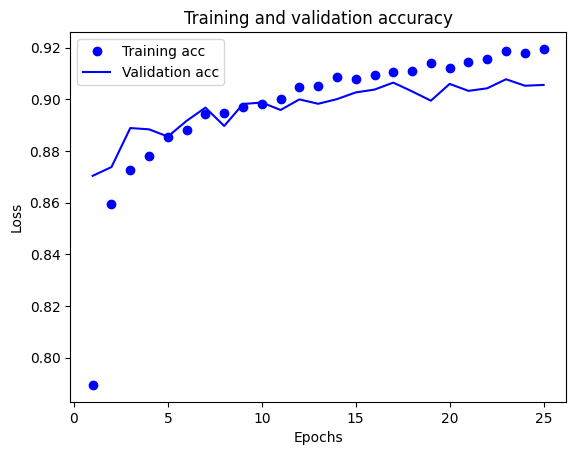

In [19]:
import matplotlib.pyplot as plt

history_visual(history1)

Висновок №2


Побудована модель з використанням VGG16 показала непогані результати на навчальній вибірці: точність нейромережі становить майже 92%. На валідаційних даних максимальна точність склала 90%. Ці результати схожі з тими, які було отримано у домашньому завданні №9, але гірші за отримані у першій частині завдання №10. Потрібно більше епох для якісного навчання моделі з використанням VGG16.